# Лабораторна робота #6
## З дисципліни Інтелектуальний аналіз даних
## Студента групи МІТ-31
## __Єрмакова Юрія__


Виконати вирішення задачs класифікації для 3 класів з набору даних food101

Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком (обчислені значення індексів вказані у даному документі у стовпчиках D:F))

## Базова ініціалізація

In [4]:
VARIANT = 5

In [8]:
import random as rnd
import pathlib
import os
from zipfile import ZipFile

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
zip = ZipFile('101_food_classes_10_percent.zip', 'r')
zip.extractall()
zip.close()


In [11]:
data_dir = pathlib.Path('101_food_classes_10_percent/train/')
classes = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(classes)

['apple_pie' 'baby_back_ribs' 'baklava' 'beef_carpaccio' 'beef_tartare'
 'beet_salad' 'beignets' 'bibimbap' 'bread_pudding' 'breakfast_burrito'
 'bruschetta' 'caesar_salad' 'cannoli' 'caprese_salad' 'carrot_cake'
 'ceviche' 'cheese_plate' 'cheesecake' 'chicken_curry'
 'chicken_quesadilla' 'chicken_wings' 'chocolate_cake' 'chocolate_mousse'
 'churros' 'clam_chowder' 'club_sandwich' 'crab_cakes' 'creme_brulee'
 'croque_madame' 'cup_cakes' 'deviled_eggs' 'donuts' 'dumplings' 'edamame'
 'eggs_benedict' 'escargots' 'falafel' 'filet_mignon' 'fish_and_chips'
 'foie_gras' 'french_fries' 'french_onion_soup' 'french_toast'
 'fried_calamari' 'fried_rice' 'frozen_yogurt' 'garlic_bread' 'gnocchi'
 'greek_salad' 'grilled_cheese_sandwich' 'grilled_salmon' 'guacamole'
 'gyoza' 'hamburger' 'hot_and_sour_soup' 'hot_dog' 'huevos_rancheros'
 'hummus' 'ice_cream' 'lasagna' 'lobster_bisque' 'lobster_roll_sandwich'
 'macaroni_and_cheese' 'macarons' 'miso_soup' 'mussels' 'nachos'
 'omelette' 'onion_rings' 'oy

In [12]:
l = []
arr = (VARIANT - 1, VARIANT + 29, VARIANT + 59)
for i in range(len(classes)):
    if i in arr:
        l.append(classes[i])

print(l)

['beef_tartare', 'eggs_benedict', 'miso_soup']


In [30]:
def pick_random_image(base_dir):
  random_image = rnd.sample(os.listdir(base_dir), 1)
  return pltimg.imread(base_dir + '/' + random_image[0])


def display_image(img):
  plt.imshow(img)
  plt.axis('off')
  print(f'size: {img.shape[0]}x{img.shape[1]}')


size: 512x512


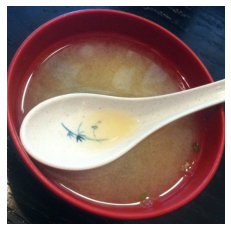

In [31]:
img = pick_random_image('101_food_classes_10_percent/train/miso_soup')
display_image(img)

In [32]:
img / 255 # where 255 is 1 byte color size to normalize values

array([[[0.09411765, 0.19607843, 0.33333333],
        [0.08235294, 0.18431373, 0.32156863],
        [0.0745098 , 0.17647059, 0.31372549],
        ...,
        [0.05490196, 0.09803922, 0.16862745],
        [0.06666667, 0.10980392, 0.18039216],
        [0.0745098 , 0.11764706, 0.18823529]],

       [[0.08627451, 0.18823529, 0.3254902 ],
        [0.08235294, 0.18431373, 0.32156863],
        [0.08627451, 0.18823529, 0.3254902 ],
        ...,
        [0.04705882, 0.09019608, 0.16078431],
        [0.05490196, 0.09803922, 0.16862745],
        [0.0627451 , 0.10588235, 0.17647059]],

       [[0.0745098 , 0.17647059, 0.31372549],
        [0.0745098 , 0.17647059, 0.31372549],
        [0.08627451, 0.18039216, 0.32156863],
        ...,
        [0.03921569, 0.09019608, 0.16470588],
        [0.04705882, 0.09803922, 0.16470588],
        [0.05490196, 0.10588235, 0.17254902]],

       ...,

       [[0.14901961, 0.15686275, 0.15294118],
        [0.15686275, 0.16470588, 0.16078431],
        [0.13333333, 0

### Train model

In [ ]:
tf.random.set_seed(999)


train_datagen = ImageDataGenerator(rescale=1.0 / 255)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_dir = '101_food_classes_10_percent/train/'
test_dir = '101_food_classes_10_percent/test/'

model_params = {
  'batch_size': 32,
  'target_size': (224, 224),
  'class_mode': 'sparse',
  'seed': 42
}

train_data = train_datagen.flow_from_directory(train_dir, **model_params)
valid_data = valid_datagen.flow_from_directory(test_dir, **model_params)


model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='softmax')
])

model_1.compile(loss="binary_crossentropy",
  optimizer=tf.keras.optimizers.Adam(),
  metrics=["accuracy"])

history_1 = model_1.fit(train_data,
    epochs=2,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data))